In [2]:
import pandas as pd
# import sklearn

# sklearn.__version__
#!pip install pyarrow

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
#df=pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet') 
df=pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet') 

df['duration']=df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td:td.total_seconds()/60) 
#df=df[df.trip_type==2]

df=df[(df.duration>=1) & (df.duration <= 60)]

categorical=['PULocationID','DOLocationID']
numerical=['trip_distance']

df[categorical]=df[categorical].astype(str)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

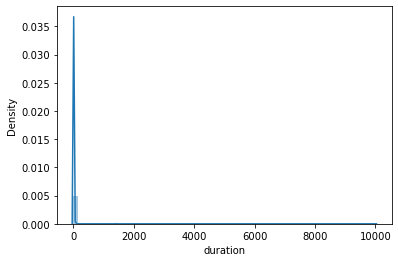

In [23]:
sns.distplot(df.duration)

In [26]:
#df.duration.describe()
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
95%      3.646667e+01
98%      4.873333e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [9]:

# df[categorical+numerical].iloc[:10].to_dict(orient='records')
train_dicts=df[categorical+numerical].to_dict(orient='records')

dv=DictVectorizer()
X_train=dv.fit_transform(train_dicts)

target='duration'
y_train=df[target].values

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_train)

mean_squared_error(y_train,y_pred,squared=False)

In [12]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

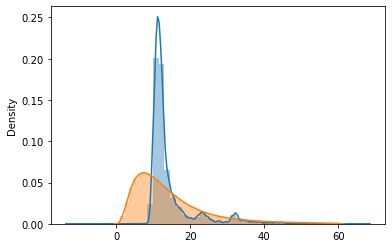

In [20]:
sns.distplot(y_pred,label='prediction')
sns.distplot(y_train,label='actual')

In [27]:
def read_dataframe(filename):
    #'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet'
    #df=pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet') 
    df=pd.read_parquet(filename) 

    df['duration']=df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td:td.total_seconds()/60) 
    #df=df[df.trip_type==2]

    df=df[(df.duration>=1) & (df.duration <= 60)]

    categorical=['PULocationID','DOLocationID']
    numerical=['trip_distance']

    df[categorical]=df[categorical].astype(str)
    return df

In [28]:
df_train=read_dataframe('./data/yellow_tripdata_2023-01.parquet')
df_val=read_dataframe('./data/yellow_tripdata_2023-02.parquet')

In [29]:
len(df_train),len(df_val)

(3009173, 2855951)

In [ ]:
dv=DictVectorizer()

# df[categorical+numerical].iloc[:10].to_dict(orient='records')
train_dicts=df[categorical+numerical].to_dict(orient='records')
X_train=dv.fit_transform(train_dicts)

target='duration'
y_train=df[target].values

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_train)

mean_squared_error(y_train,y_pred,squared=False)